In [1]:
import numpy as np
import photutils
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from glob import glob
from scipy.signal import convolve2d
import cv2

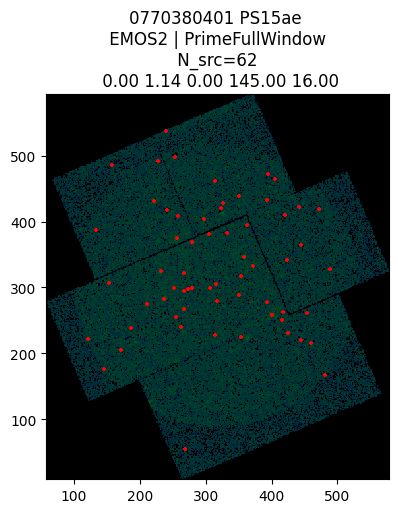

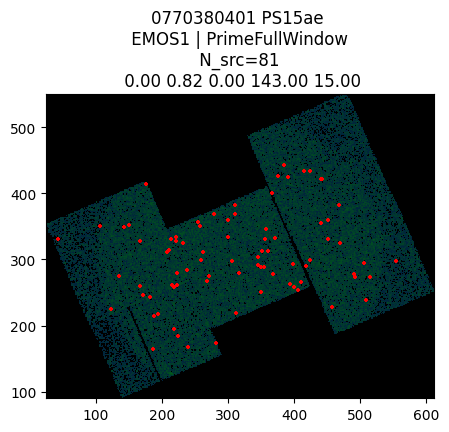

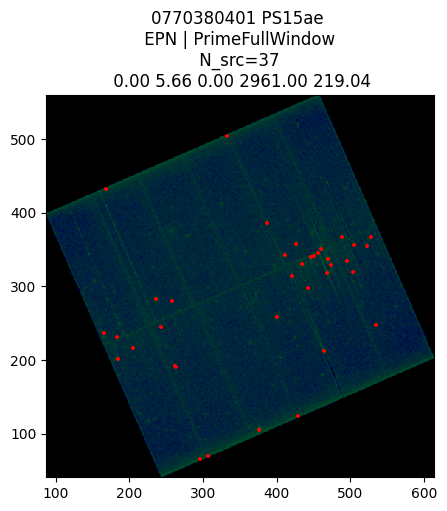

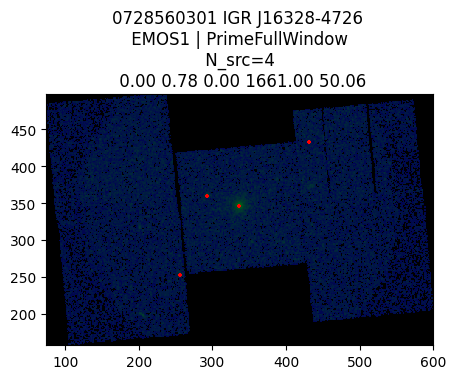

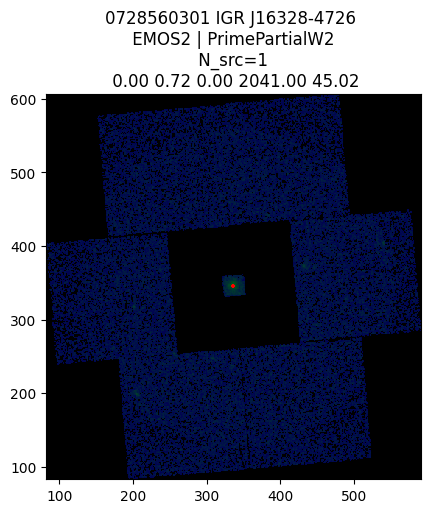

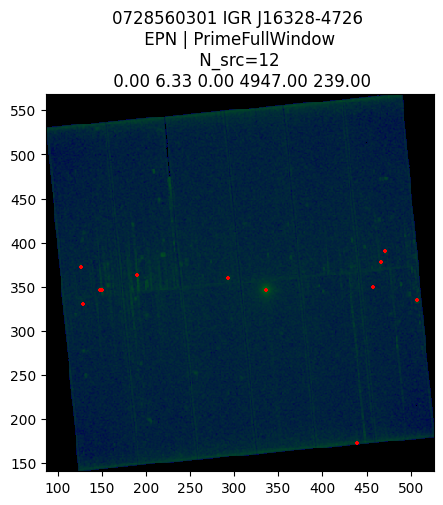

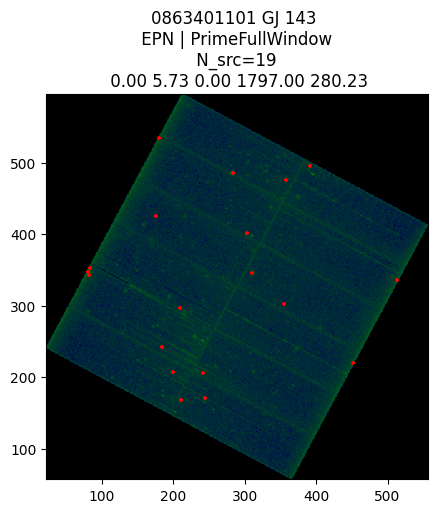

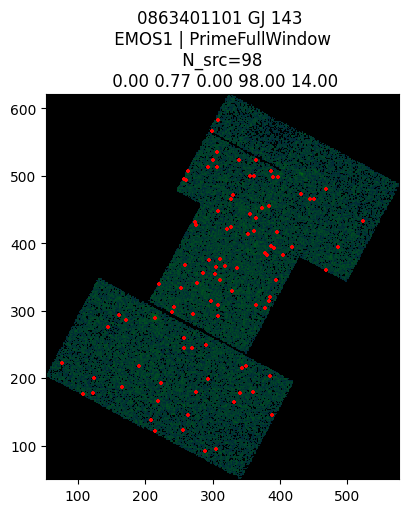

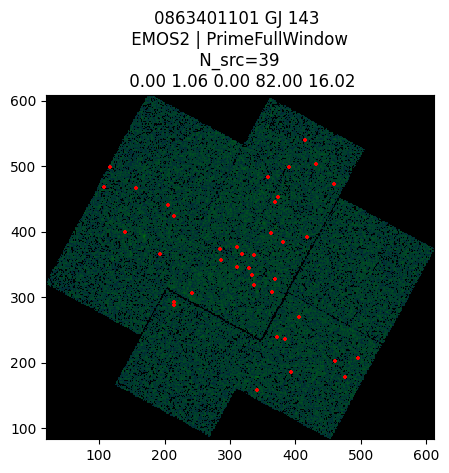

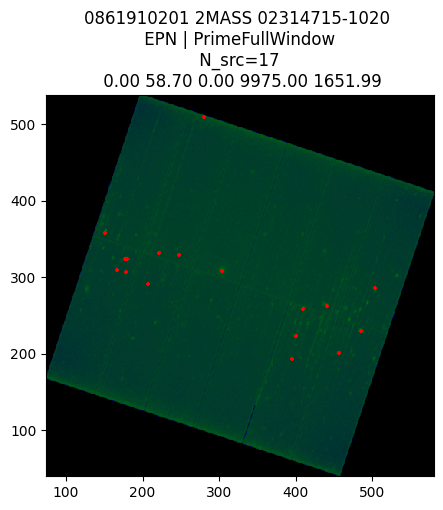

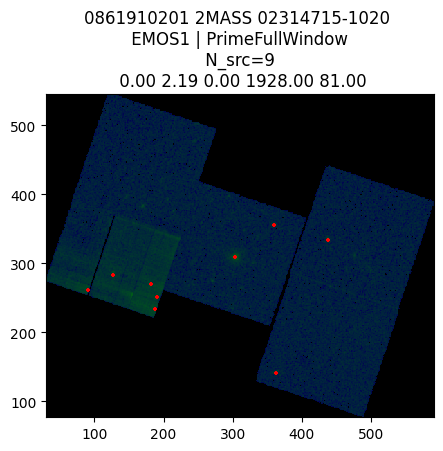

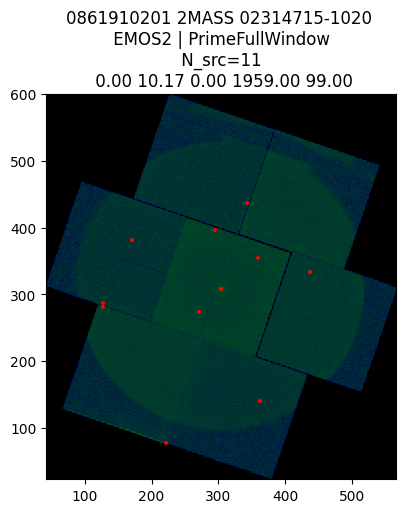

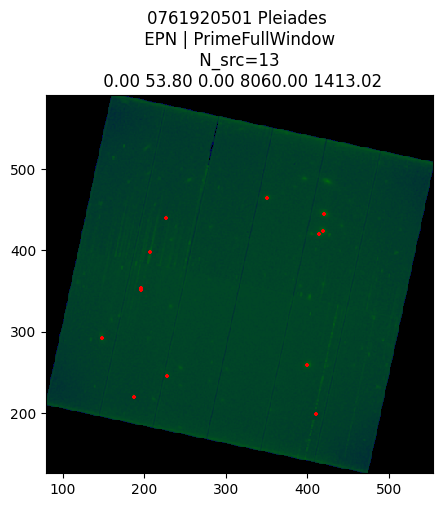

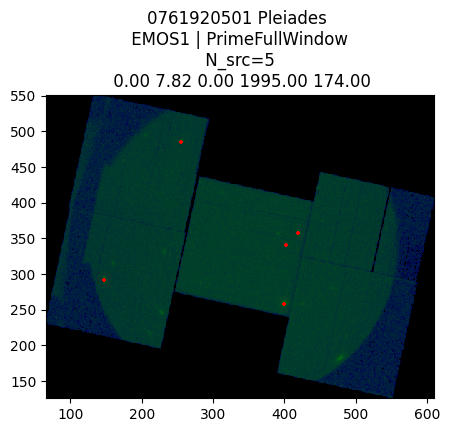

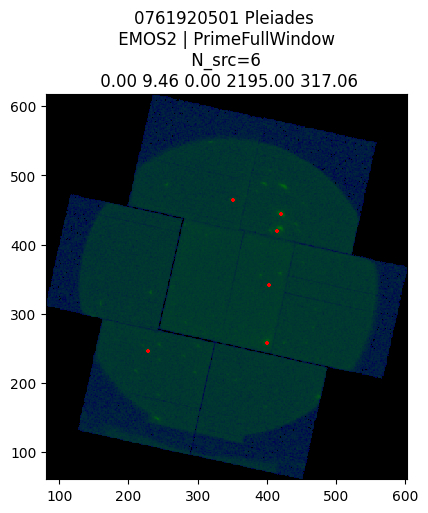

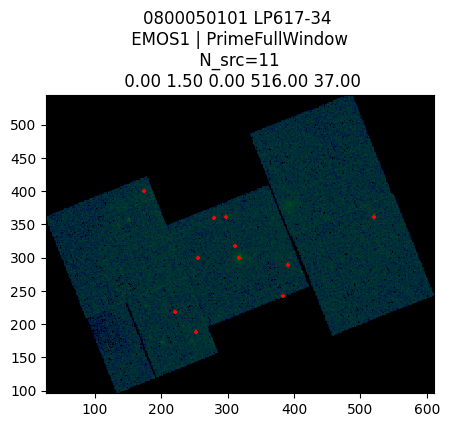

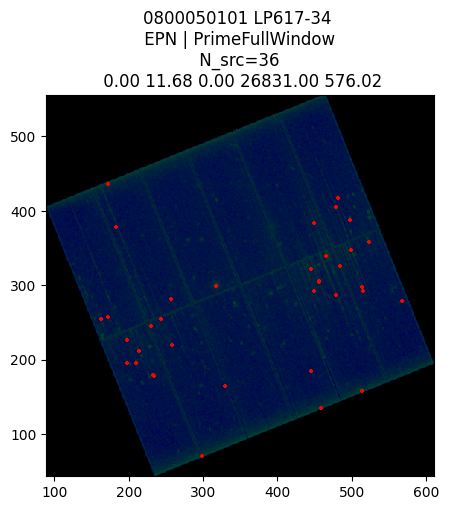

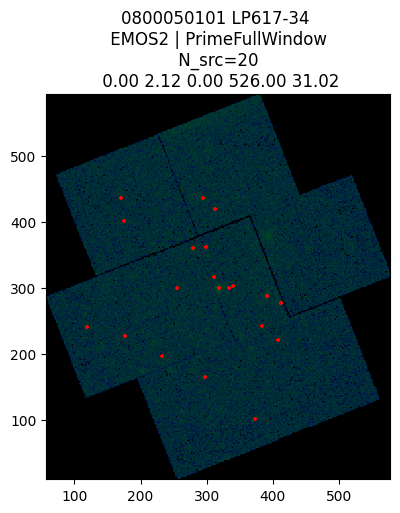

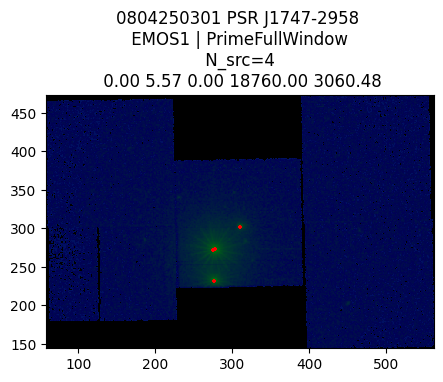

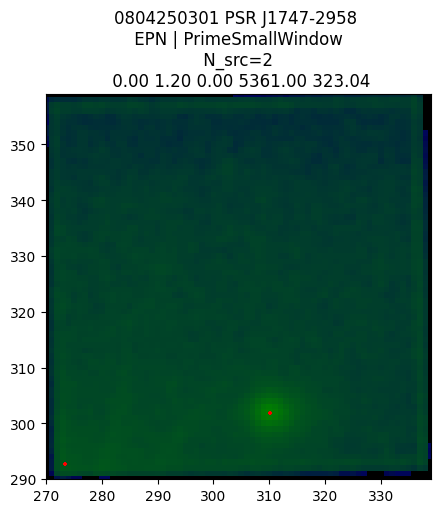

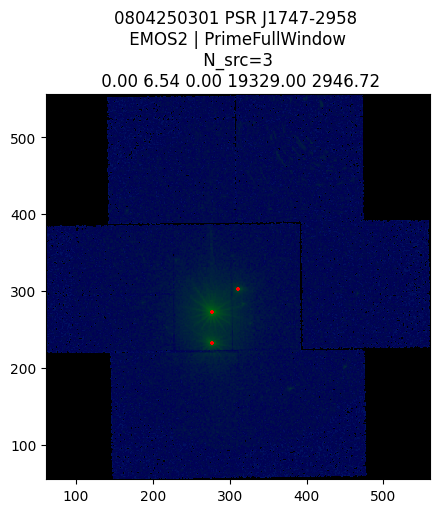

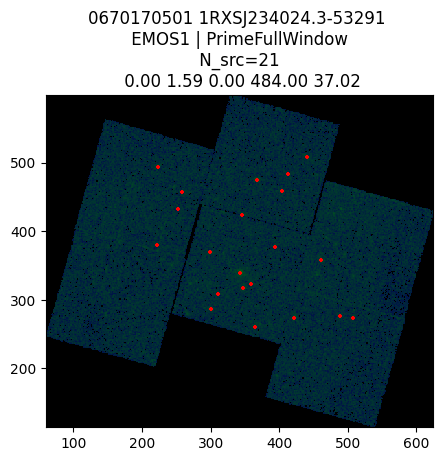

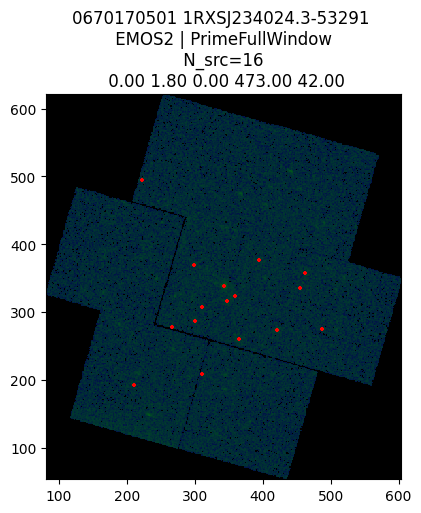

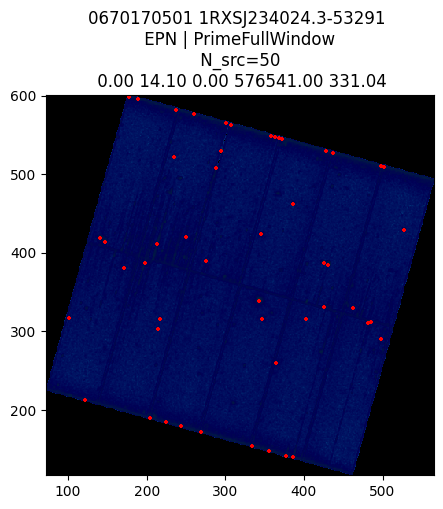

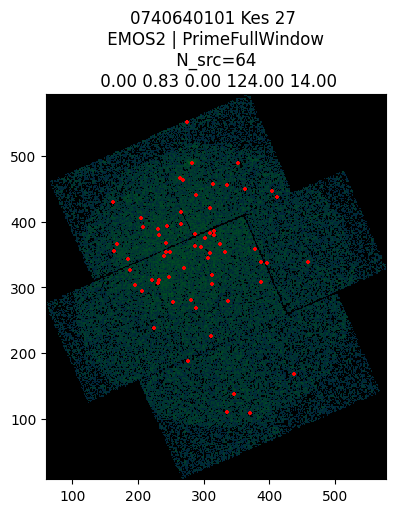

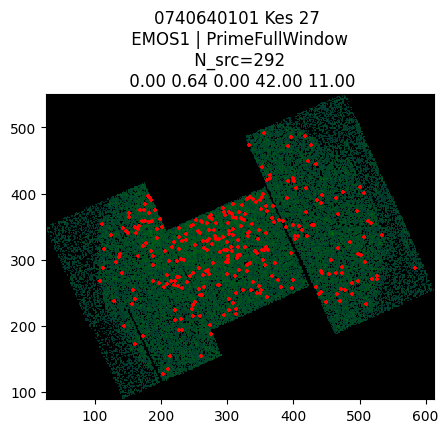

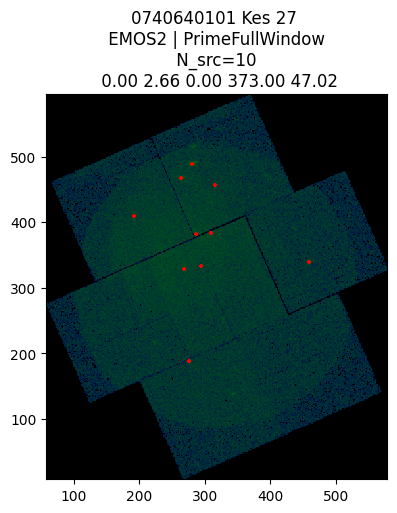

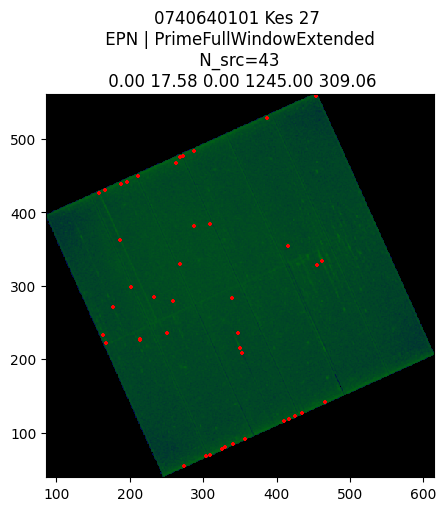

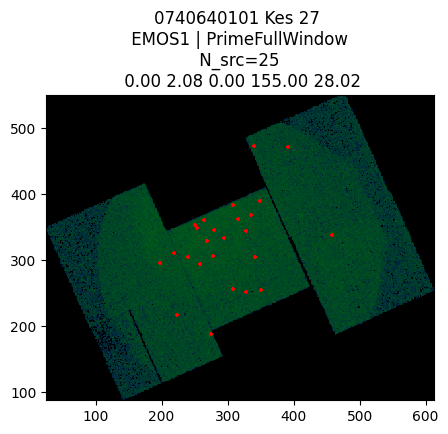

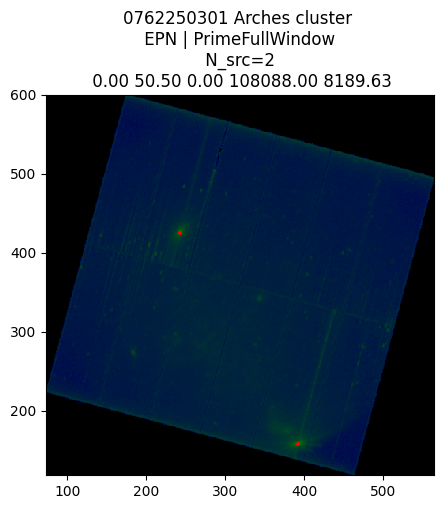

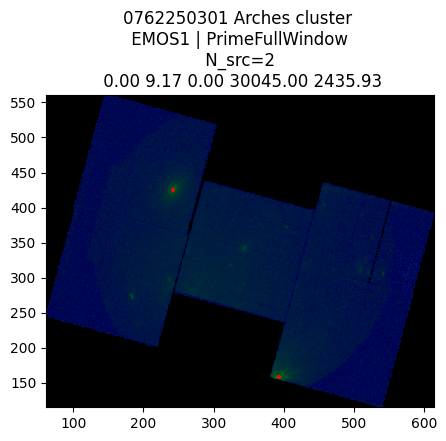


KeyboardInterrupt



In [2]:
for f in glob('../data/processed/*/*_IMG*'):
    hdul = fits.open(f)
    data = hdul[0].data
    header = hdul[0].header

    data_mask = (data == 0) # Mask to Exclude 0 areas

    kernel_2x2 = np.array([[1, 1],
                           [1, 1]])
    
    kernel_3x3 = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])
    
    data = convolve2d(data, kernel_2x2, mode='same', boundary='symm')

    data_min  = np.min(data)
    data_max  = np.max(data)
    data_mean = np.mean(data)
    data_med  = np.median(data)
    data_9998  = np.percentile(data, 99.98)

    sf = photutils.detection.DAOStarFinder(threshold=0.5*data_9998,
                                           fwhm=2.0,
                                           ratio=1.0,
                                           theta=0.0,
                                           sigma_radius=1.5,
                                           sharplo=0.2,
                                           sharphi=1.0,
                                           roundlo=-1.0,
                                           roundhi=1.0,
                                           sky=0.0,
                                           exclude_border=False,
                                           brightest=None,
                                           peakmax=None,
                                           xycoords=None,
                                           min_separation=0.0)

    
    tab_sources = sf.find_stars(data=data, mask=data_mask)
    
    plt.figure(figsize=(5,5))
    cmap = plt.cm.ocean_r
    cmap.set_bad('black')
    
    plt.imshow(data, norm=LogNorm(vmin=np.min(data), vmax=np.max(data)), cmap=cmap, interpolation='none')
    if tab_sources:
        plt.scatter(tab_sources['xcentroid'], tab_sources['ycentroid'], color='red', marker='+', s=5.0)
    else:
        tab_sources = 0
    plt.title(f'{header['OBS_ID']} {header['OBJECT']} \n {header['INSTRUME']} | {header['SUBMODE']} \n N_src={len(tab_sources)} \n {data_min:.2f} {data_mean:.2f} {data_med:.2f} {data_max:.2f} {data_9998:.2f}')
    
    # Set the x-axis and y-axis limits to exclude surrounding 0 values
    plt.xlim(np.min(np.nonzero(data)[1]), np.max(np.nonzero(data)[1]))
    plt.ylim(np.min(np.nonzero(data)[0]), np.max(np.nonzero(data)[0]))
    plt.show()
    tab_sources

In [ ]:
hdul = fits.open(f)
data = hdul[0].data
header = hdul[0].header
plt.imshow(data)

In [ ]:
for f in glob('../data/processed/*/*_image*'):
    hdul = fits.open(f)
    data = hdul[0].data
    header = hdul[0].header

    fig, ax = plt.subplots(1,2,figsize=(15,7.5))
    ax[0].imshow(data, cmap='hot')

    data = np.uint8(data)
    data = cv2.fastNlMeansDenoising(data)
    #cv2.denoise_TVL1
    #plt.figure(figsize=(3,3))
    ax[1].imshow(data, cmap='hot')
    #plt.colorbar()
    plt.show()
    
    
    """
    plt.figure(figsize=(5,5))
    cmap = plt.cm.ocean_r
    cmap.set_bad('black')
    
    
    plt.imshow(data, norm=LogNorm(vmin=np.min(data), vmax=np.max(data)), cmap=cmap, interpolation='none')
    
    
    plt.title(f'{header['OBS_ID']} | {header['INSTRUME']} | {header['SUBMODE']} | {header['OBJECT']} |N_src={len(tab_sources)}')
    
    # Set the x-axis and y-axis limits to exclude surrounding 0 values
    #plt.xlim(np.min(np.nonzero(data)[1]), np.max(np.nonzero(data)[1]))
    #plt.ylim(np.min(np.nonzero(data)[0]), np.max(np.nonzero(data)[0]))
    
    """

In [ ]:
f = glob('../data/processed/*/*PI*FILT*')[2]
hdul = fits.open(f)
data = hdul[1].data
header = hdul[1].header
print(f)
print(data)
print(repr(header['TLMAX6']))

In [ ]:
from exod.xmm.event_list import EventList
from exod.pre_processing.data_loader import DataLoader

In [ ]:
evt = EventList(f)
evt.read()

In [ ]:
dl = DataLoader(evt)
dl.run()

In [ ]:
data_cube = dl.data_cube

In [ ]:
for i in range(data_cube.shape[2]):
    plt.imshow(data_cube.data[:,:,i])
    plt.show()